### SD-Turbo

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/8 [00:00<?, ?it/s]

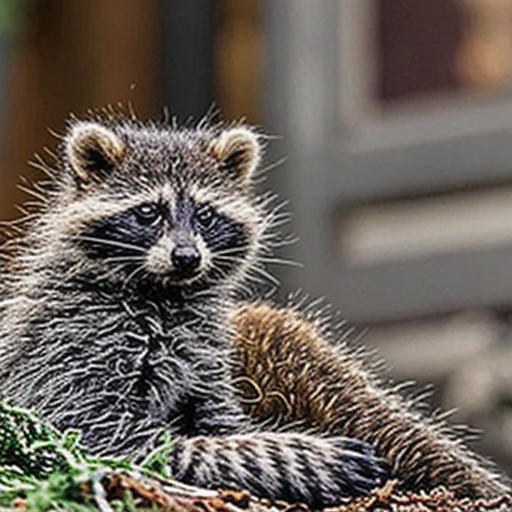

In [ ]:
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, safety_checker=True, variant="fp16")
pipe.to("cuda")

prompt = "A cinematic shot of a baby racoon wearing an intricate italian priest robe."
image = pipe(prompt=prompt, num_inference_steps=8, guidance_scale=0.0).images[0]
image

### SD-Turbo XL

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = [
    "portrait photo of the oldest warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
    "Self-portrait oil painting, a beautiful cyborg with golden hair, 8k",
    "A cinematic shot of a baby racoon wearing an intricate italian priest robe."]

image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0, num_images_per_prompt=8,).images

make_image_grid(image, rows=len(prompt), cols=8).save("sdxl_turbo.png")